Found 29 images belonging to 1 classes.
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6902 - accuracy: 0.6897
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.8825e-05 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 982ms/step - loss: 2.1284e-10 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.0100e-16 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 1.9460e-24 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 8.5180e-33 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 

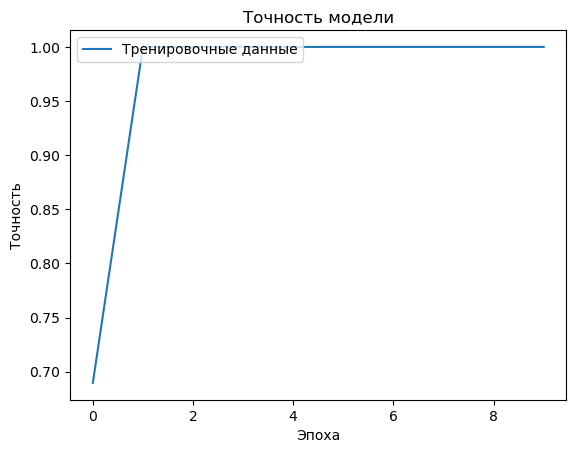

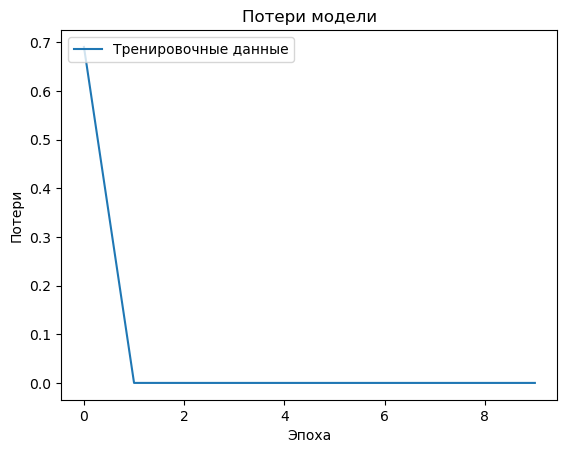

In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Путь к папке с изображениями
data_dir = 'C:\\map'

# Параметры изображений
img_width, img_height = 320, 240  # Размеры изображений должны быть предварительно определены

# Создание модели CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Используйте sigmoid для бинарной классификации
])

# Компиляция модели
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Создание генераторов данных
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Подготовка генератора данных обучения
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')  # Используйте 'binary' для бинарной классификации

# Убедимся, что train_generator не пустой
if train_generator.samples == 0:
    raise ValueError("Генератор данных обучения не содержит изображений.")

# Вычисляем steps_per_epoch так, чтобы оно было > 0
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)

# Обучение модели
history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=10)

# Сохранение модели в формате Keras
model.save('corn_stage_classifier.keras')

# Проверяем существование файла после сохранения
if tf.io.gfile.exists('corn_stage_classifier.keras'):
    print("Model saved successfully.")
else:
    print("Model saving failed.")
    
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочные данные'], loc='upper left')
plt.show()

# Суммируем историю для потерь
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(['Тренировочные данные'], loc='upper left')
plt.show()
